In [ ]:
# !pip install numpy==1.18.0

In [ ]:
import numpy as np
np.__version__

'1.22.4'

In [ ]:
import pandas as pd
data = pd.read_csv('Lemonade.csv')
data[:4]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17


In [ ]:
X, y = data.iloc[:, 1:5].values, data.iloc[:, [-1]].values

# 將星期幾轉換成數字
days = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}
X[:, 0] = [days[day] for day in X[:, 0]]
X = X.astype('float32') # <--本來星期是文字

X[:3]


array([[ 0.  , 27.  ,  2.  , 15.  ],
       [ 1.  , 28.9 ,  1.33, 15.  ],
       [ 2.  , 34.5 ,  1.33, 27.  ]], dtype=float32)

In [ ]:
# 標準化特徵值
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# split data to train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((292, 4), (73, 4), (292, 1), (73, 1))

In [ ]:
# INPUT --> DENSE --> OUTPUT
from keras.models import Sequential # 預先匯入一個MODEL 框架
from keras.layers import Dense
model = Sequential()
model.add( Dense(128, activation='relu', input_shape=(4,) ) ) # 將圖片 4, --> 128(神經元)輸出
model.add( Dense(64, activation='relu' ) ) # 
model.add( Dense(32, activation='relu' ) ) # 
model.add( Dense(16, activation='relu' ) ) # 
model.add( Dense(1)    ) # 直接輸出數字就可以 無須啟動(softmax)函數 去判斷 yes|no
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 編譯模型 指定使用甚麼優化器 計算偏差 Loss 量測精準度
# https://keras.io/api/losses/regression_losses/
model.compile(optimizer='adam', loss='mse')
# MeanSquaredLogarithmicError

In [ ]:
train_history =model.fit(X_train, y_train,
                            batch_size=10,
                            epochs=100,
                            verbose=2, # 顯示過程
                            validation_data=[X_test, y_test])

Epoch 1/100
30/30 - 8s - loss: 688.1055 - val_loss: 544.7776 - 8s/epoch - 280ms/step
Epoch 2/100
30/30 - 0s - loss: 492.0409 - val_loss: 196.5392 - 131ms/epoch - 4ms/step
Epoch 3/100
30/30 - 0s - loss: 88.4600 - val_loss: 53.3454 - 132ms/epoch - 4ms/step
Epoch 4/100
30/30 - 0s - loss: 35.0938 - val_loss: 29.5548 - 136ms/epoch - 5ms/step
Epoch 5/100
30/30 - 0s - loss: 18.2658 - val_loss: 17.8139 - 131ms/epoch - 4ms/step
Epoch 6/100
30/30 - 0s - loss: 11.5529 - val_loss: 12.3390 - 125ms/epoch - 4ms/step
Epoch 7/100
30/30 - 0s - loss: 8.2617 - val_loss: 9.5916 - 132ms/epoch - 4ms/step
Epoch 8/100
30/30 - 0s - loss: 7.0671 - val_loss: 7.0826 - 134ms/epoch - 4ms/step
Epoch 9/100
30/30 - 0s - loss: 4.9192 - val_loss: 5.3008 - 138ms/epoch - 5ms/step
Epoch 10/100
30/30 - 0s - loss: 3.8512 - val_loss: 4.2355 - 120ms/epoch - 4ms/step
Epoch 11/100
30/30 - 0s - loss: 3.2067 - val_loss: 3.3088 - 140ms/epoch - 5ms/step
Epoch 12/100
30/30 - 0s - loss: 2.7531 - val_loss: 3.4137 - 135ms/epoch - 4ms/ste

In [ ]:
train_history.history.keys()

dict_keys(['loss', 'val_loss'])

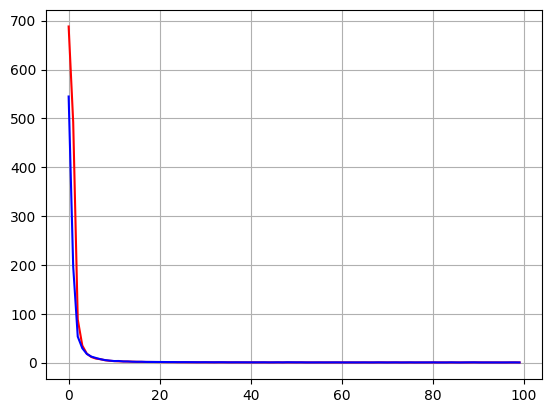

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()

In [ ]:
import numpy as np
np.average((model.predict(X_test) - y_test)**2), np.average((model.predict(X_train) - y_train)**2)

10/10 [==============================] - 0s 2ms/step


(0.4530016126773885, 0.41303327075374224)

12/12 [==============================] - 0s 2ms/step


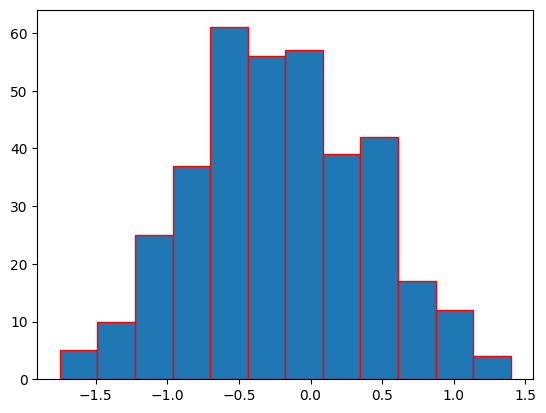

In [ ]:
# residuals plot
y_pred = model.predict(X)
resi = (y - y_pred)

import matplotlib.pyplot as plt
plt.hist(resi, bins=12, edgecolor='red')
plt.show()

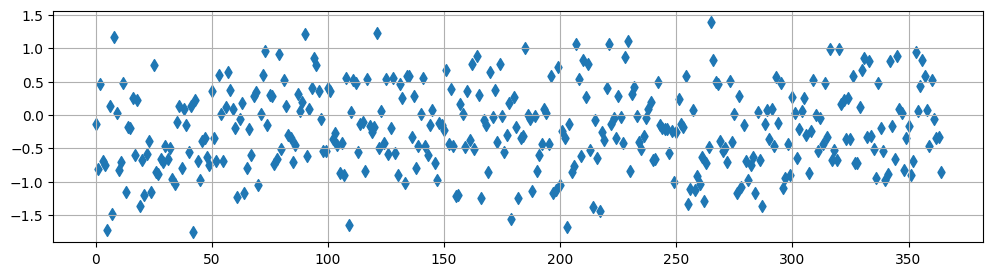

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.scatter(range(len(resi)), resi, marker='d')
plt.grid()
plt.show()

In [ ]:
# mse
# rmse
import numpy as np
np.average(resi ** 2), np.sqrt(np.mean(resi ** 2))

(0.4210269416985321, 0.6488658888387739)